### PHYS3600 ID Final Quiz, May 16 - Programming section

You have 10 questions; each of them is worth 5 points. Total time is 60 minutes and you can use all your notebooks and notes but not the Internet. I ask that you turn off your wifi after downloading the assignment and you turn it back on at the time of submission.

0: Please write your name here (but sorry no points for this one): **Christ-Brian Amedjonekou**
    
    

In [1]:
#I did the imports for you to make it easier
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn import metrics
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

#This should never be done in real life but I want to make things easier for you
import warnings
warnings.filterwarnings("ignore")

The following lines will help you load a data set about prices of houses in Boston (circa 1978) and define two array, X and y, that contain the data and the target values. We are doing some data manipulation to get rid of some missing data but <b> your final arrays will be called X and y.</b>

In [2]:
data = datasets.load_boston()
X1 = data.data #features; unfortunately we can't go in detail about each of them
y1 = data.target #price in $1000's

#Some data are missing and have an artificial price point of 50, so let's get rid of them.

mask = np.where(y1 != 50) #points we want to keep

s = np.arange(X1[mask].shape[0])
np.random.shuffle(s) #shuffles in place

X = X1[mask][s]
y = y1[mask][s]

1\. How many instances are in your (new) data set? How many features? 

In [3]:
print('Number of Instances:',X.shape[0])

Number of Instances: 490


In [4]:
print('Number of Features:',X.shape[1])

Number of Features: 13


2\. Is this a classification or regression problem? Justify your answer.

* **This is a regression problem because 'Y', the target vector, has values that do not represent categories. They are not integers; They are real numbers. This means they aren't categorical data that has been encoded with a numerical value. See first ten elements of 'Y', the target vector, below:**

In [5]:
y[:10]

array([ 5. , 24.5, 18.1, 10.5, 14.4, 19.8, 14.6, 21.4, 19.9, 13.1])

3\. Plot each of the feature of your data set in a histogram, with different labels. 

In [6]:
import pandas as pd

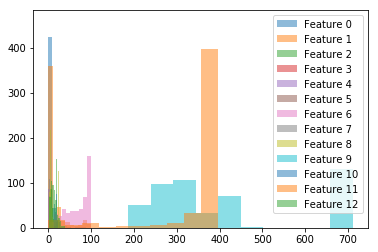

In [7]:
feature_names = []

for i in range(X.shape[1]):
    name = 'Feature '+ str(i)
    feature_names.append(name)
features = pd.DataFrame(data= X, columns= feature_names)

for name in feature_names:
    plt.hist(features[name],alpha=0.5,histtype='stepfilled',label = name);
plt.legend(loc= 'best')

4\. Use a linear regression algorithm with default parameters. Report the average score of a 5-fold cross validation and the standard deviation of the scores vector. <b> Important: use, here and in the following </b>, cv=5, not a StratifiedKFold, and 'r2' (the r2 score) as your scoring parameter.

In [8]:
model = LinearRegression()
scores = cross_val_score(model, X, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.7597300769692431
Standard Deviation: 0.02500573058781243


In [9]:
# Ignore, I wanted to see all scores.
scores

array([0.75842091, 0.73942703, 0.80336303, 0.76554549, 0.73189392])

5\. Use a decision tree regressor with default parameter values and report the average r2 score of a 5-fold cross validation, and the standard deviation of the scores vector. Which one performs better, linear regression or Decision Tree?

* **To give a definite answer this question, I'll say that Decision Tree Regressor performed better on average but the difference between the two is very small.**

In [10]:
model2 = DecisionTreeRegressor()
scores = cross_val_score(model2, X, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.7295493369621615
Standard Deviation: 0.02866502645818271


In [11]:
# Ignore, I wanted to see all scores.
scores

array([0.7419199 , 0.7411551 , 0.69603191, 0.77073252, 0.69790726])

6\. Let's try and diagnose the high bias/high variance for this classifier. In the cell below you will find the "check train test" function from the lecture notebook (already adapted for regression). Use it to evaluate the gap between train and test scores for the decision tree model. Based on your answer, do you think the algorithm suffers from high variance or high bias?

* **The Training Scores are perfect but the Test scores are approx 75% of the training scores. This is a significant gap, and the training scores aren't trash either. These are symptoms of "High Variance"**

In [12]:
def checktraintest(X, y, model, ntrials =5, test_size = 0.2):

    scores_train = np.zeros(ntrials)
    scores_test = np.zeros(ntrials)

    for i in range(ntrials):
        X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=test_size, random_state=i)
        model.fit(X_train, y_train)
        pred_test = model.predict(X_test)
        pred_train = model.predict(X_train)

        scores_test[i] = (metrics.r2_score(y_test,pred_test))
        scores_train[i] =(metrics.r2_score(y_train,pred_train))

    print('Training scores '+str(scores_train.mean())+' +- '+str(scores_train.std()))
    print('Test scores '+str(scores_test.mean())+' +- '+str(scores_test.std()))

In [13]:
checktraintest(X, y, model2)

Training scores 1.0 +- 0.0
Test scores 0.7396691285806398 +- 0.07438974206961309


7\. Let's switch to an Extremely Random Tree (ERT) Regressor with default parameters. Report the scores (mean and standard deviation) for a 5 fold cross validation. Did you find an improvement with respect to a single Decision Tree regressor? Was it expected, given what you found in 6 and the nature of ensemble algorithms?

* **The Extremely Random Tree algorithm has produced better scores than the Decision Tree Regressor. I was expecting higher test scores because the high variance issue should have been resolved w/ the implementation of the Extremely Random Tree algorithm. This was the case.**




In [14]:
model3 = ExtraTreesRegressor()
scores = cross_val_score(model3, X, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.8598463692329199
Standard Deviation: 0.01193019748840563


In [15]:
# Ignore, I wanted to see all scores.
scores

array([0.86745076, 0.8505876 , 0.87936703, 0.85461714, 0.84720931])

8\. For the ERT, let's do a little optimization. Change the min_sample_leaf parameter to 2, 5 and 10 and report the different scores. Also report the train/test scores using the function checktraintest. 

In [16]:
model3 = ExtraTreesRegressor(min_samples_leaf= 2)
scores = cross_val_score(model3, X, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.8686175837367223
Standard Deviation: 0.01115159850026362


In [17]:
# Ignore, I wanted to see all scores.
checktraintest(X, y, model3)

Training scores 0.9827466099627811 +- 0.001450685552568599
Test scores 0.8820960219227185 +- 0.02070361921109431


In [18]:
model3 = ExtraTreesRegressor(min_samples_leaf= 5)
scores = cross_val_score(model3, X, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.8613832930957408
Standard Deviation: 0.016061276603429313


In [19]:
# Ignore, I wanted to see all scores.
checktraintest(X, y, model3)

Training scores 0.9214331813938624 +- 0.003359385869218958
Test scores 0.8622661369107002 +- 0.023797111727786334


In [20]:
model3 = ExtraTreesRegressor(min_samples_leaf= 5)
scores = cross_val_score(model3, X, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.8627933573590145
Standard Deviation: 0.008674869481229601


In [21]:
# Ignore, I wanted to see all scores.
checktraintest(X, y, model3)

Training scores 0.9213990505043524 +- 0.00654396615416713
Test scores 0.8537177218297177 +- 0.023239519501907342


9\. On the basis of your results above, what is the best choice for the min_samples_leaf parameter? Justify your answer.

* **`min_samples_leaf= 2` provided me with the best scores. An increase in sample leaves is supposed to reduce variance, thus increasing the test score but that wasn't the case.**

10: Plot the feature importance for this data set for Extremely Random Trees regressor model. How many features are essential in this data set? 

* **I would say a total of 4 features are essential to this Dataset. Because of what i did earlier in pandas, I can tell which ones. (Kinda wish I had a 'grinning' emoji here)**


* Important Features in order of importance:
    * Feature 5
    * Feature 12
    * Feature 2
    * Feature 10

Feature ranking:
1. feature 5 (0.378790)
2. feature 12 (0.224345)
3. feature 2 (0.150172)
4. feature 10 (0.078632)
5. feature 9 (0.053440)
6. feature 0 (0.035273)
7. feature 6 (0.028058)
8. feature 4 (0.020594)
9. feature 8 (0.012011)
10. feature 11 (0.009857)
11. feature 7 (0.007766)
12. feature 1 (0.000874)
13. feature 3 (0.000189)


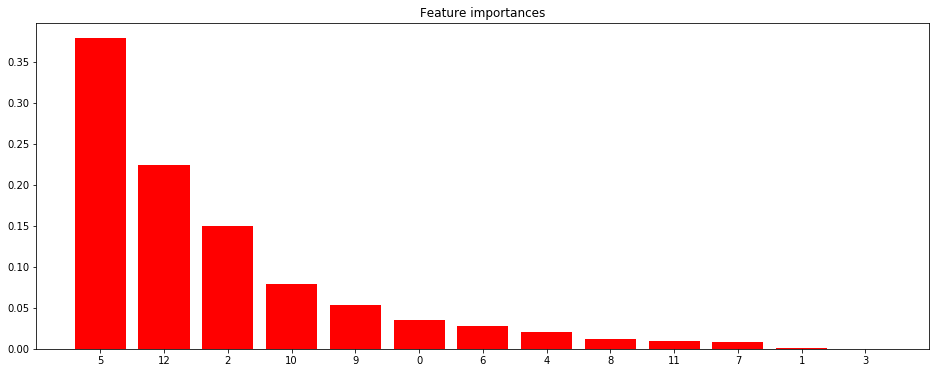

In [22]:
importances = model3.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(features.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(16,6))
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices],
       color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

EC1: Play with other parameters of the ERT to see if you can beat the test scores obtained in 8-9. Hint: think carefully about which parameter(s) is/are worth trying!

In [30]:
model3 = ExtraTreesRegressor(min_samples_leaf= 1, max_depth= 11)
scores = cross_val_score(model3, X, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.8687101056320892
Standard Deviation: 0.011633484456521627


EC2: What reduction in r2 score would you obtain if you were to use only the two most important features?

In [24]:
X1 = features[['Feature 5', 'Feature 12']]
scores = cross_val_score(model3, X1, y, scoring= 'r2', cv= 5)
print('Mean:', scores.mean())
print('Standard Deviation:', scores.std())

Mean: 0.7719466725586414
Standard Deviation: 0.05139898569319071
